# 라이브러리 불러오기

In [14]:
from glob import glob 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import folium
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 불러오기

In [15]:
glob('data/*.csv')

[]

In [16]:
pd.read_csv('train.csv')

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0


In [17]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [18]:
test = test.set_index('ID')
train = train.set_index('ID')
submission = submission.set_index('ID')

# 데이터 살펴보기

칼럼 설명
- ID : 샘플 별 고유 id
- Exercise_Duration  : 운동 시간(분)
- Body_Temperature(F) : 체온
- BPM : 심박수
- Height(Feet) : 키(피트)
- Height(Remainder_Inches) : 키(피트 계산 후 더해야 할 키)
- Weight(lb) : 몸무게(파운드)
- Weight_Status : 체중 상태
- Gender : 성별
- Age : 나이
- Calories_Burned : 칼로리 소모량(목표 예측값)

In [19]:
train.head()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
ID,,,,,,,,,,
TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


## 결측치 확인

In [20]:
# 결측치 없음 
train.isnull().sum()

Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [21]:
# 결측치 없음 
test.isnull().sum()

Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
dtype: int64

## 이상치 확인

In [22]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [23]:
train.describe(include='O')

,Weight_Status,Gender
count,7500,7500
unique,3,2
top,Normal Weight,F
freq,4681,3769


<Axes: >

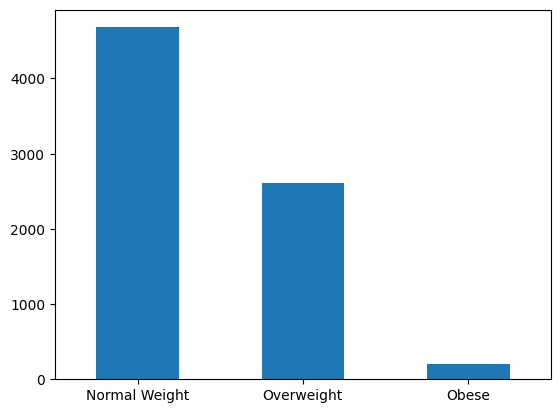

In [24]:
# Obese가 현저히 적음
train['Weight_Status'].value_counts().plot.bar(rot=0)

In [25]:
train['Weight_Status'].value_counts(1)

Normal Weight    0.624133
Overweight       0.348533
Obese            0.027333
Name: Weight_Status, dtype: float64

<Axes: >

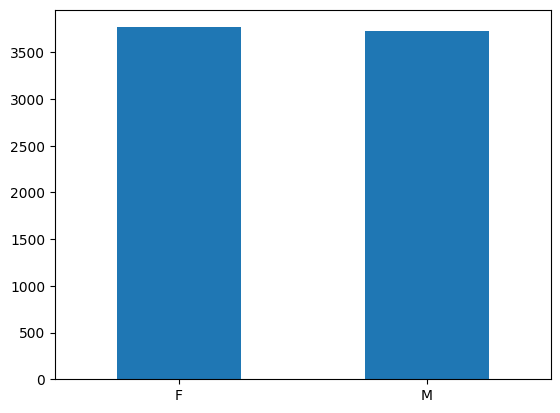

In [26]:
train['Gender'].value_counts().plot.bar(rot=0)

# 피처 엔지니어링

In [27]:
train.head(2)

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
ID,,,,,,,,,,
TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0


## 두 키 변수를 합해서 하나의 변수로 만들어 준다. 

In [28]:
# ft, inch column을 하나의 cm 컬럼으로 변경해줌 
train['Height(cm)'] = train['Height(Feet)'] * 30.48 + train['Height(Remainder_Inches)']*2.54
test['Height(cm)'] = test['Height(Feet)'] * 30.48 + test['Height(Remainder_Inches)']*2.54

In [29]:
# 기존 ft, inch column은 삭제 
train = train.drop(columns=['Height(Feet)','Height(Remainder_Inches)'])
test = test.drop(columns=['Height(Feet)','Height(Remainder_Inches)'])

## 몸무게와 몸의 온도를 kg, 섭씨로 바꿔준다. 

In [30]:
train['Weight(kg)'] = train['Weight(lb)'] * 0.45359237
test['Weight(kg)'] = test['Weight(lb)'] * 0.45359237

train['Body_Temperature(C)'] = (train['Body_Temperature(F)'] - 32)*(5/9)
test['Body_Temperature(C)'] = (test['Body_Temperature(F)'] - 32)*(5/9)

# drop
train = train.drop(columns=['Weight(lb)','Body_Temperature(F)'])
test = test.drop(columns=['Weight(lb)','Body_Temperature(F)'])

## Weight status column을 삭제하고 bmi column 추가

In [31]:
train.head(2)

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Height(cm),Weight(kg),Body_Temperature(C)
ID,,,,,,,,,
TRAIN_0000,26.0,107.0,Normal Weight,F,45,166.0,175.26,69.989303,40.888889
TRAIN_0001,7.0,88.0,Overweight,M,50,33.0,198.12,102.012924,39.611111


In [32]:
train = train.drop(columns='Weight_Status')
test = test.drop(columns='Weight_Status')

In [33]:
train['BMI'] = train['Weight(kg)'] / np.square((train['Height(cm)']*0.01))
test['BMI'] = test['Weight(kg)'] / np.square((test['Height(cm)']*0.01))

## 성별 숫자형으로 전환

In [34]:
# Label Encoding 
# Train 데이터 
train.loc[train['Gender'] == 'F', 'Gender'] = 0
train.loc[train['Gender'] == 'M', 'Gender'] = 1

# Test 데이터 
test.loc[test['Gender'] == 'F', 'Gender'] = 0
test.loc[test['Gender'] == 'M', 'Gender'] = 1

In [35]:
# dtype 변경해 주기 
train['Gender'] = train['Gender'].astype('int')
test['Gender'] = test['Gender'].astype('int')

## 칼럼 순서 조정

In [36]:
train = train[['Gender','Exercise_Duration', 'BPM',  'Age', 'Height(cm)', 
               'Weight(kg)', 'Body_Temperature(C)', 'BMI', 'Calories_Burned']]

In [37]:
test = test[['Gender','Exercise_Duration', 'BPM',  'Age', 'Height(cm)',
             'Weight(kg)', 'Body_Temperature(C)', 'BMI']]

In [38]:
train.head(2)

,Gender,Exercise_Duration,BPM,Age,Height(cm),Weight(kg),Body_Temperature(C),BMI,Calories_Burned
ID,,,,,,,,,
TRAIN_0000,0,26.0,107.0,45,175.26,69.989303,40.888889,22.785893,166.0
TRAIN_0001,1,7.0,88.0,50,198.12,102.012924,39.611111,25.989538,33.0


In [39]:
test.head(2)

,Gender,Exercise_Duration,BPM,Age,Height(cm),Weight(kg),Body_Temperature(C),BMI
ID,,,,,,,,
TEST_0000,0,26.0,107.0,45,154.94,51.981686,40.611111,21.653258
TEST_0001,1,29.0,111.0,21,187.96,89.992726,40.500000,25.472791


# 데이터 시각화

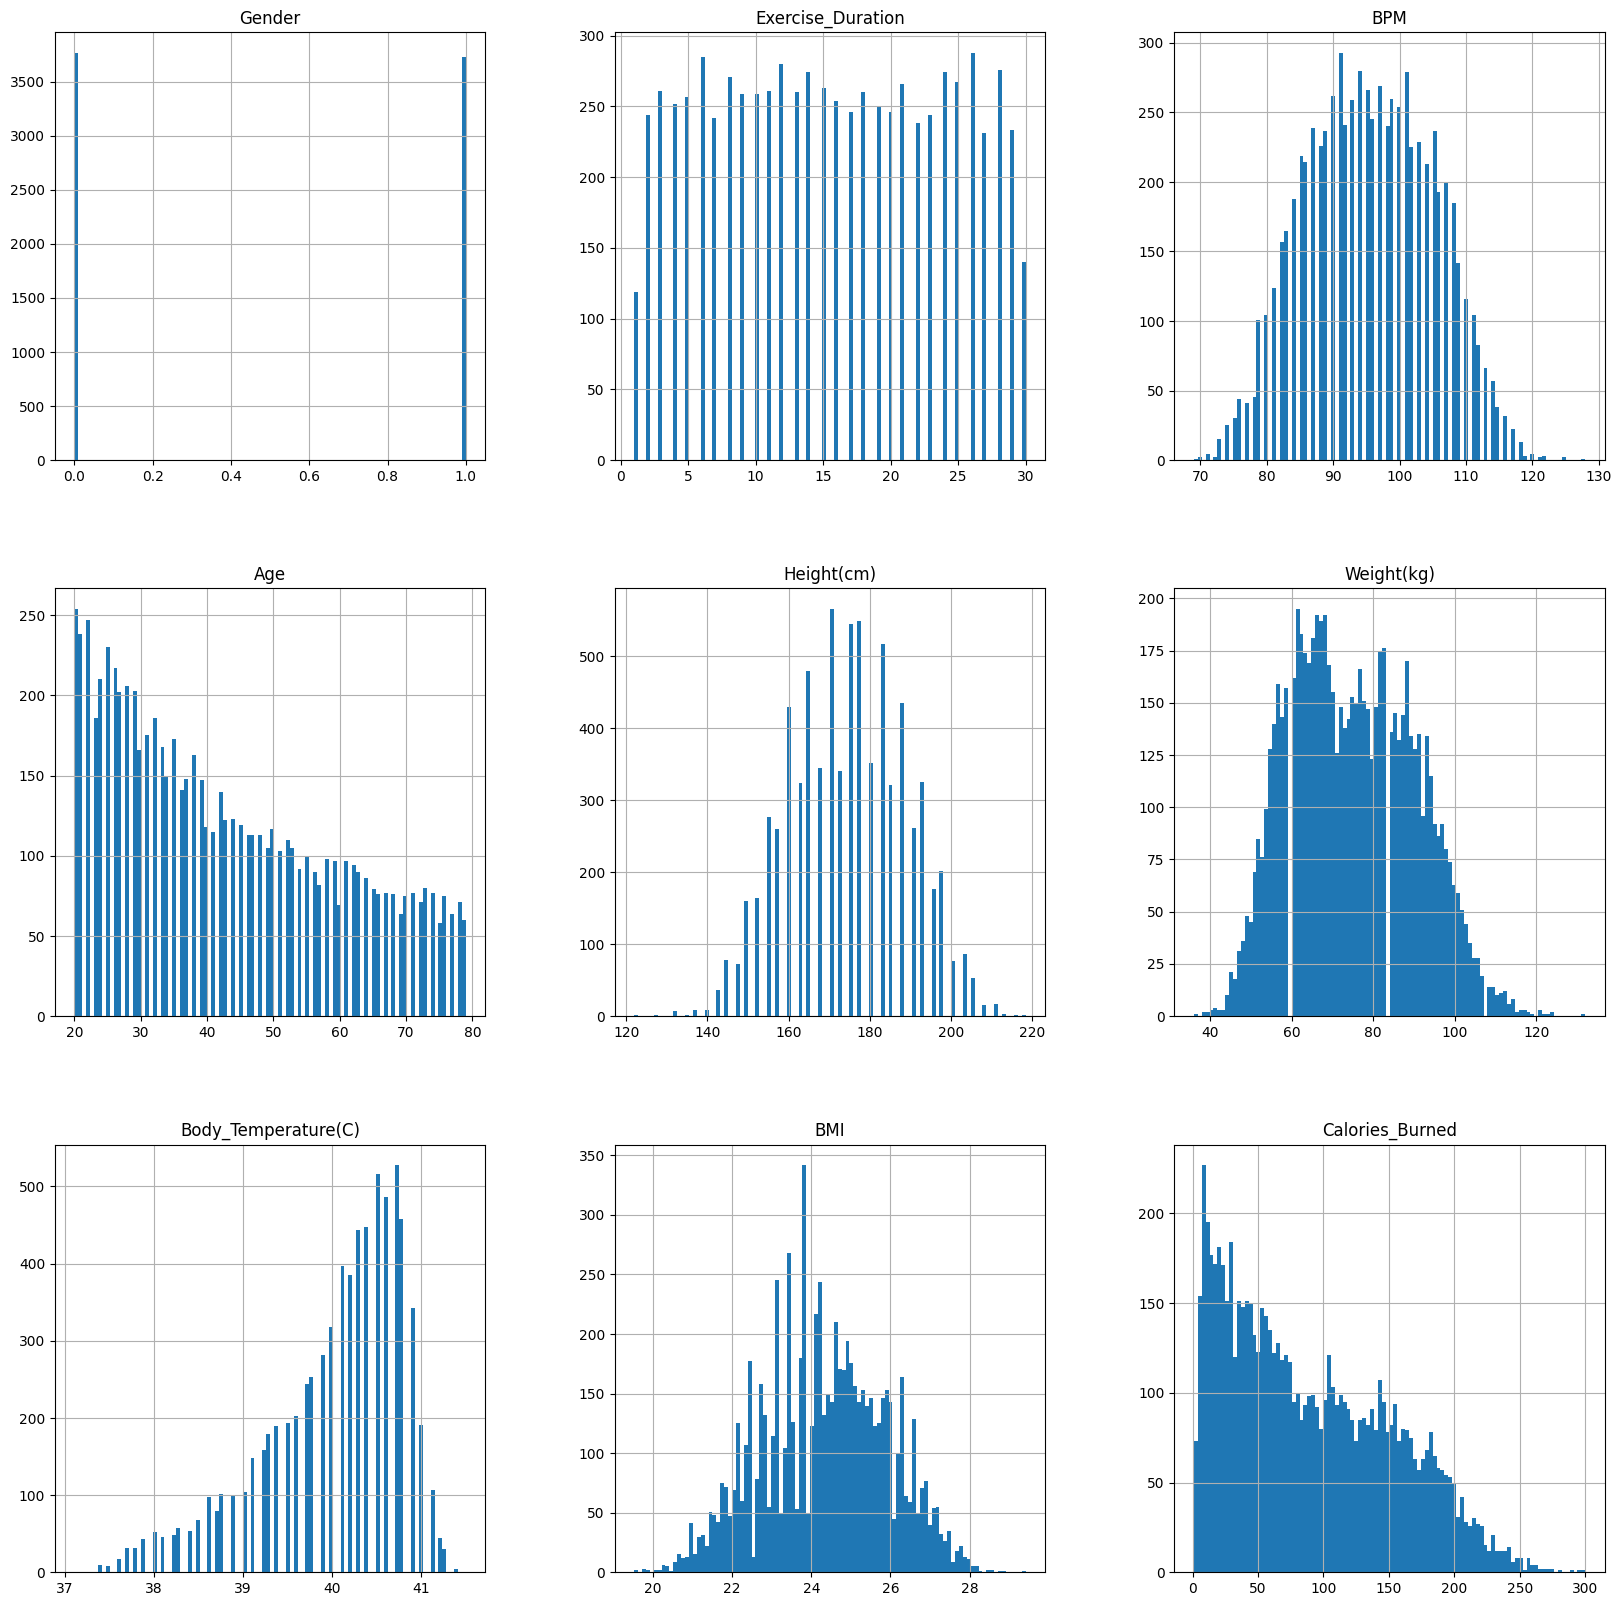

In [40]:
train.hist(bins=100,figsize=(20,20));

In [41]:
train['Body_Temperature(C)'].describe()

count    7500.000000
mean       40.018652
std         0.784914
min        37.111111
25%        39.611111
50%        40.222222
75%        40.611111
max        41.500000
Name: Body_Temperature(C), dtype: float64

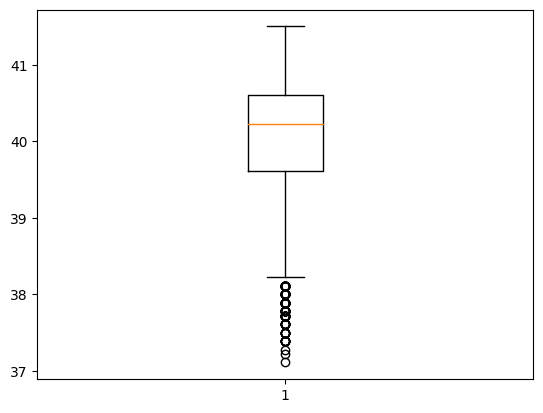

In [42]:
# 몇 개의 낮은 온도의 Outlier가 보입니다. 
plt.boxplot(train['Body_Temperature(C)']);

In [43]:
train['BPM'].describe()

count    7500.000000
mean       95.498133
std         9.587331
min        69.000000
25%        88.000000
50%        95.000000
75%       103.000000
max       128.000000
Name: BPM, dtype: float64

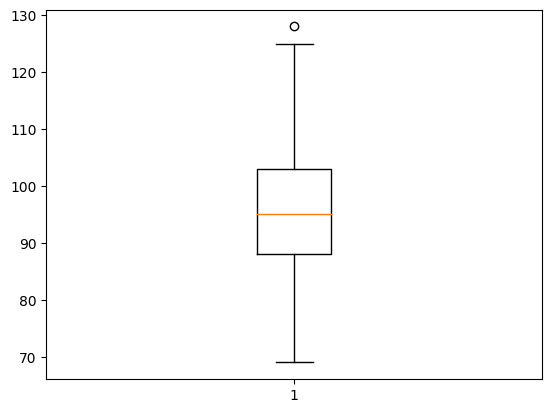

In [44]:
# 심박도 Outlier가 하나 있습니다. 
plt.boxplot(train['BPM']);

In [45]:
train['Weight(kg)'].describe()

count    7500.000000
mean       75.006573
std        15.108316
min        36.015234
25%        63.003980
50%        73.980916
75%        86.999017
max       131.995380
Name: Weight(kg), dtype: float64

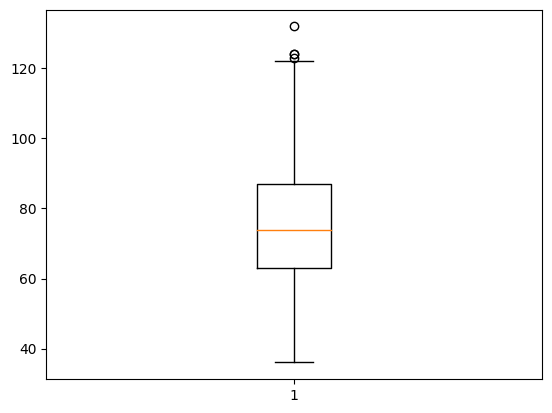

In [46]:
# 몇 개의 몸무게 outlier가 있습니다. 
plt.boxplot(train['Weight(kg)']);

## 전체 분포 확인

<Axes: >

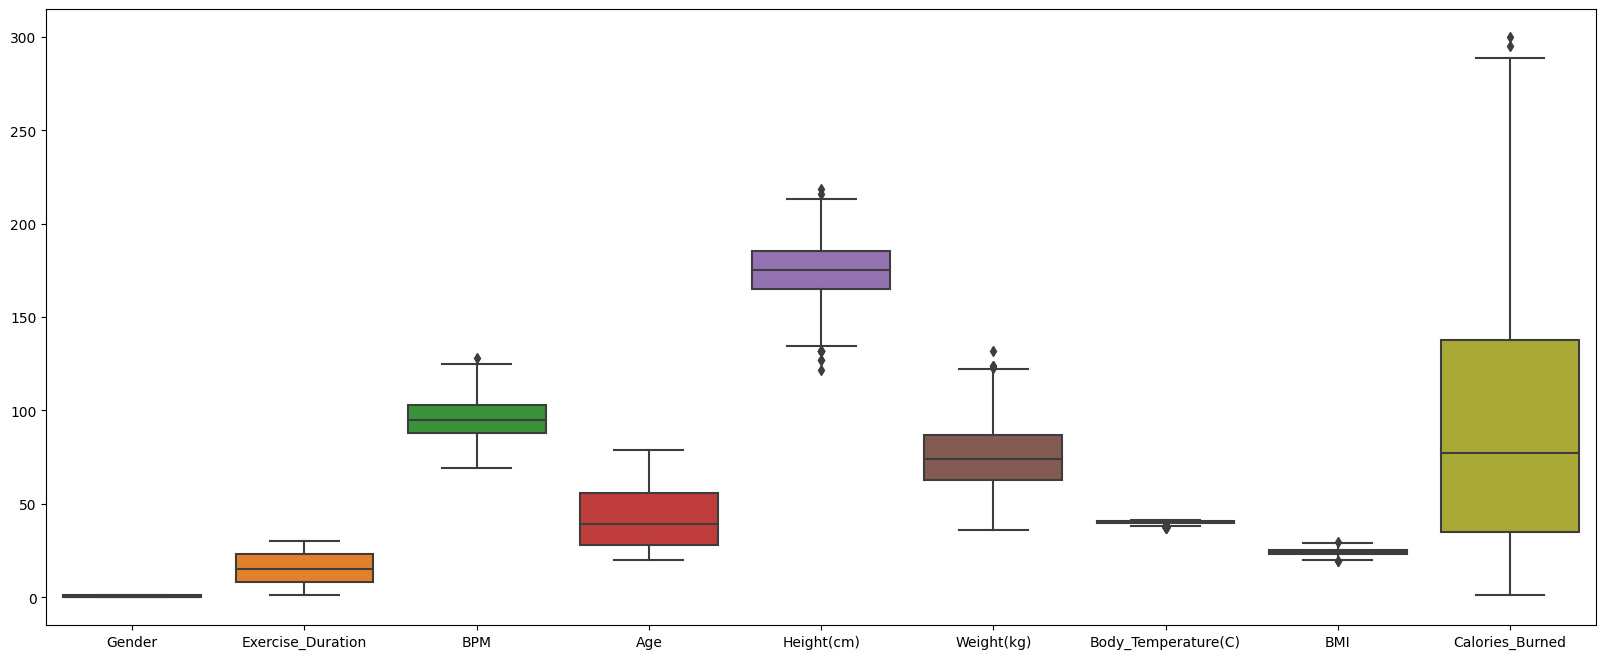

In [47]:
# 인코딩을 한 값을 제외하면 분포가 고르지 않은 걸 확인할 수 있다. 
plt.figure(figsize=(20,8))
sns.boxplot(train)

## 상관계수 분석

In [48]:
# 인코딩된 컬럼을 제외하고 상관계수 분석 
correlation = train[['Exercise_Duration', 'BPM', 'Age','Height(cm)',
                     'Weight(kg)', 'Body_Temperature(C)', 'Calories_Burned']].corr()

<Axes: >

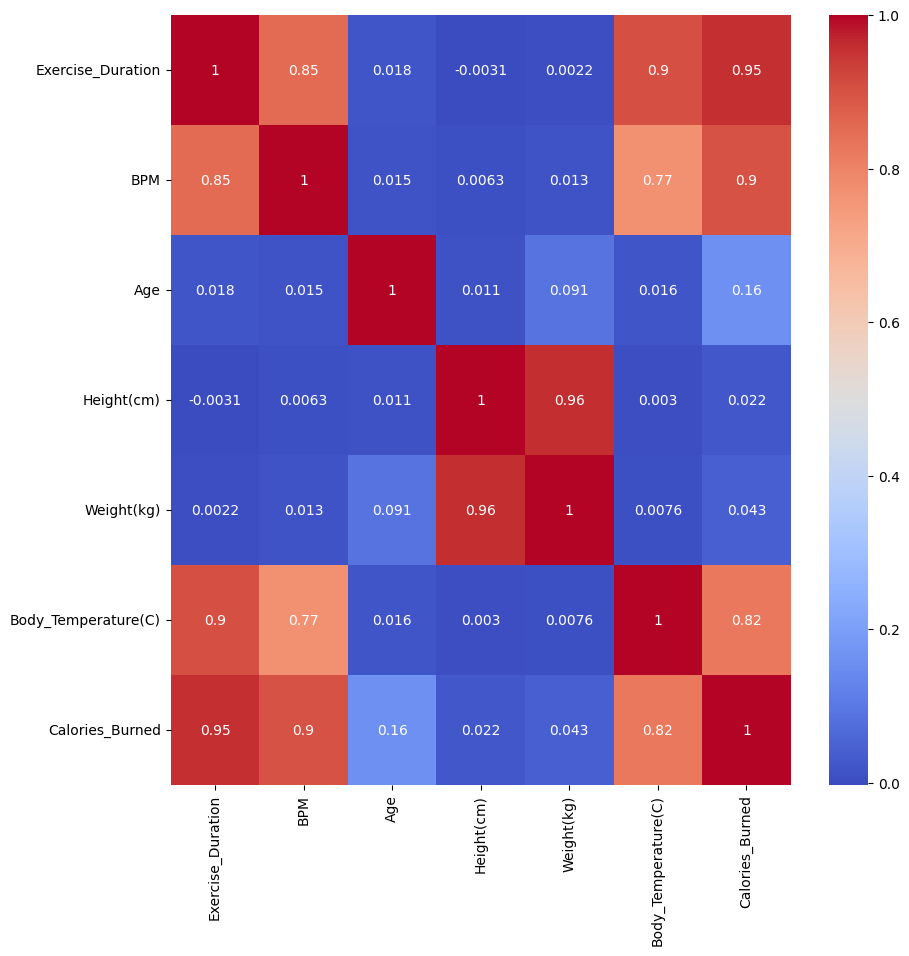

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# PolynomialFeatures로 변수 다양화 하기 + 표준화

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(include_bias=False)

poly_train = pd.DataFrame(poly.fit_transform(train.iloc[:,1:-1]), index=[train.index])
poly_test = pd.DataFrame(poly.fit_transform(test.iloc[:,1:]), index=[test.index])

In [52]:
poly_train

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_0000,26.0,107.0,45.0,175.26,69.989303,40.888889,22.785893,676.0,2782.0,1170.0,...,30716.0676,12266.325190,7166.186667,3993.455591,4898.502491,2861.784821,1594.768756,1671.901235,931.689843,519.196916
TRAIN_0001,7.0,88.0,50.0,198.12,102.012924,39.611111,25.989538,49.0,616.0,350.0,...,39251.5344,20210.800505,7847.753333,5149.047245,10406.636666,4040.845268,2651.268753,1569.040123,1029.474473,675.456079
TRAIN_0002,7.0,86.0,29.0,190.50,99.019214,39.611111,27.285349,49.0,602.0,203.0,...,36290.2500,18863.160338,7545.916667,5197.859022,9804.804815,3922.261103,2701.773841,1569.040123,1080.802999,744.490281
TRAIN_0003,17.0,99.0,33.0,167.64,66.995593,40.000000,23.839159,289.0,1683.0,561.0,...,28103.1696,11231.141219,6705.600000,3996.396627,4488.409488,2679.823722,1597.118600,1600.000000,953.566363,568.305505
TRAIN_0004,9.0,88.0,38.0,177.80,77.019984,39.277778,24.363513,81.0,792.0,342.0,...,31612.8400,13694.153231,6983.588889,4331.832645,5932.078001,3025.173833,1876.477406,1542.743827,956.944657,593.580775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_7495,22.0,104.0,75.0,147.32,50.983782,40.611111,23.491385,484.0,2288.0,1650.0,...,21703.1824,7510.930821,5982.828889,3460.750909,2599.346067,2070.508051,1197.679685,1649.262346,954.011266,551.845192
TRAIN_7496,20.0,104.0,21.0,172.72,66.995593,40.722222,22.457478,400.0,2080.0,420.0,...,29832.1984,11571.478831,7033.542222,3878.855549,4488.409488,2728.209428,1504.552037,1658.299383,914.518398,504.338305
TRAIN_7497,8.0,90.0,57.0,187.96,91.988533,39.500000,26.037712,64.0,720.0,456.0,...,35328.9616,17290.164594,7424.420000,4894.048342,8461.890137,3633.547039,2395.170917,1560.250000,1028.489623,677.962445


In [53]:
train_agg = train.drop(columns=['Calories_Burned']).merge(poly_train, on='ID')
test_agg = test.merge(poly_test, on='ID')

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [55]:
train_agg.columns = train_agg.columns.astype(str)
test_agg.columns = test_agg.columns.astype(str)

In [56]:
test_agg = pd.DataFrame(scaler.fit_transform(test_agg.iloc[:,1:]), 
                         index=test.index).merge(test['Gender'], on='ID')

In [57]:
train_agg = pd.DataFrame(scaler.fit_transform(train_agg.iloc[:,1:]), 
                         index=train.index).merge(train['Gender'], on='ID')

In [58]:
train_agg.head(2)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Gender
ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_0000,1.256628,1.199774,0.140030,0.052654,-0.332109,1.108778,-0.990606,1.256628,1.199774,0.140030,...,-0.277472,0.309849,-0.494854,-0.409878,-0.230253,-0.538537,1.121631,-0.643722,-0.992645,0
TRAIN_0001,-1.017530,-0.782140,0.436203,1.649312,1.787635,-0.519252,1.046098,-1.017530,-0.782140,0.436203,...,1.862790,1.466044,1.659491,1.952401,1.709368,1.757312,-0.531438,0.835674,1.050664,1


In [59]:
test_agg.head(2)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Gender
ID,,,,,,,,,,,,,,,,,,,,,
TEST_0000,1.260436,1.196443,0.120431,-1.371519,-1.533674,0.748488,-1.710219,1.260436,1.196443,0.120431,...,-1.419294,-1.181473,-1.697361,-1.359278,-1.476390,-1.568683,0.751580,-1.446855,-1.650834,0
TEST_0001,1.622630,1.614011,-1.285101,0.950143,1.006916,0.604797,0.719082,1.622630,1.614011,-1.285101,...,0.989813,1.074948,0.999909,0.979901,1.072055,0.992748,0.604575,0.869640,0.704672,1


# 딥러닝

In [60]:
X = train_agg
y = train['Calories_Burned']

In [61]:
# tensorflow import 
import tensorflow as tf

tf.__version__

'2.12.0'

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [64]:
optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(loss="mse", 
              optimizer=optimizer, 
              metrics=["mse", "mae", tf.keras.metrics.RootMeanSquaredError()]
              )

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X, y, 
                    epochs=1000, validation_split=0.2,
                    batch_size=64,
                    callbacks=[early_stop], verbose=1)

df_hist = pd.DataFrame(history.history)


fig, axs = plt.subplots(1, 3, figsize=(16,3))

df_hist[['loss', 'val_loss']].plot(ax=axs[0], title='loss')
df_hist[['mse', 'val_mse']].plot(ax=axs[1], title='mse')
df_hist[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(ax=axs[2], title='rmse');

df_hist.tail()

In [67]:
df_hist.min()


loss                           0.118414
mse                            0.118414
mae                            0.275286
root_mean_squared_error        0.344113
val_loss                       0.181609
val_mse                        0.181609
val_mae                        0.337085
val_root_mean_squared_error    0.426156
dtype: float64

In [70]:
y_pred = model.predict(test_agg)
y_predict = y_pred.flatten()
y_predict[:5]

235/235 [==============================] - 0s 929us/step


array([172.77934 , 189.93636 ,  52.782894, 161.49158 , 226.61108 ],
      dtype=float32)

In [71]:
submission['Calories_Burned'] = y_predict
submission.to_csv('the_calories_5차_DL')


In [73]:
submission.to_csv('the_calorie_5차_Deep_Learning.csv')